In [1]:
import json
import pandas as pd

# with open('/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json', 'r') as f:
#     data = json.load(f)
data = [json.loads(line)
        for line in open('/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json', 'r', encoding='utf-8')]

df = pd.DataFrame.from_dict(data)

In [2]:
# Extract image related titles for future analysis
image_metadata = df[(df['abstract'].str.contains(
    'image') | df['title'].str.contains(
    'image')).fillna(False)]
print(len(image_metadata))

116397


In [3]:
# Extract data related to classification only
image_classification_metadata = image_metadata[(image_metadata['abstract'].str.contains(
    'classification') | image_metadata['title'].str.contains(
    'classification')).fillna(False)]
print(len(image_classification_metadata))

15708


In [4]:
# Loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [5]:
text = " ".join(titl for titl in image_classification_metadata.title)

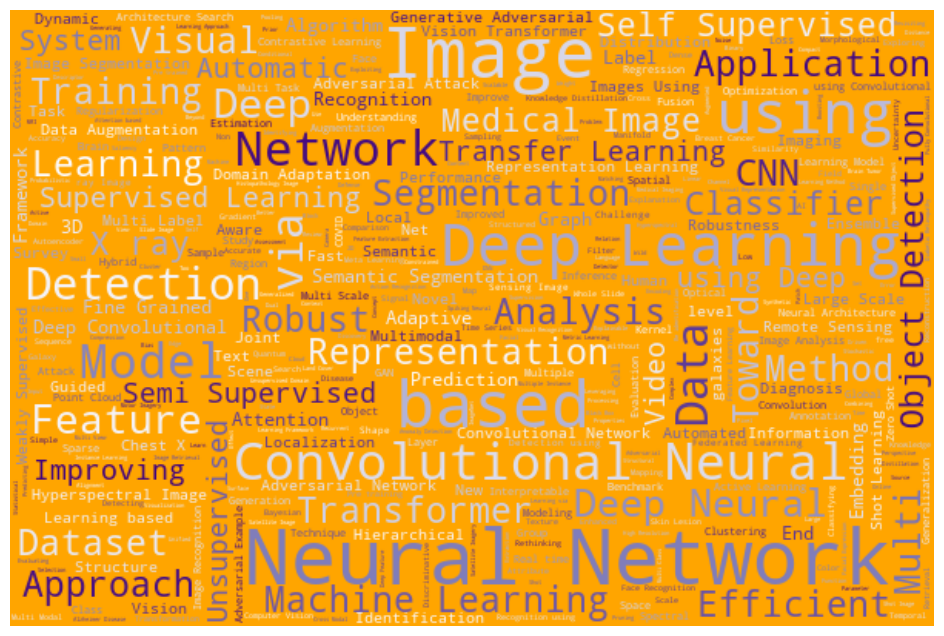

<Figure size 640x480 with 0 Axes>

In [6]:
stopwords = set(STOPWORDS)
stop_list = ['Classification', 'Deep Learning']
stopwords = list(STOPWORDS) + stop_list

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      colormap='Purples',
                      background_color="orange").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('sample.png')

In [7]:
# Extract data related to recognition only
image_recognition_metadata = image_metadata[(image_metadata['abstract'].str.contains(
    'recognition') | image_metadata['title'].str.contains(
    'recognition')).fillna(False)]
print(len(image_recognition_metadata))

7747


In [8]:
text1 = " ".join(titl for titl in image_recognition_metadata.title)

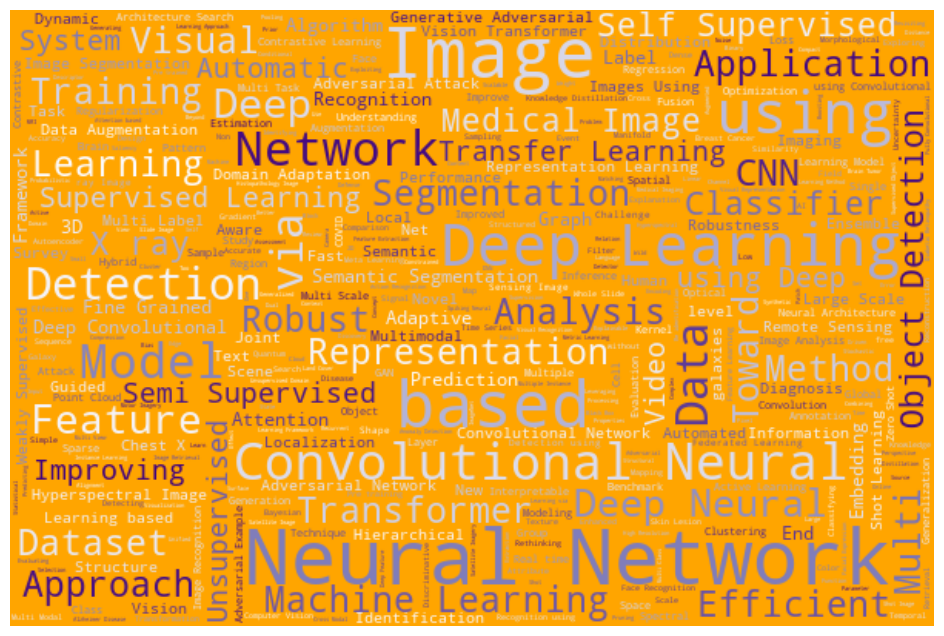

In [9]:
stopwords = set(STOPWORDS)
stop_list = ['recognition', 'Deep Learning']
stopwords = list(STOPWORDS) + stop_list

wordcloud1 = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      colormap='Purples',
                      background_color="orange").generate(text1)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
# Extract the neural network related papers
# Extract data related to classification only
image_nn_metadata = image_metadata[(image_metadata['abstract'].str.contains(
    'neural network') | image_metadata['title'].str.contains(
    'neural network')).fillna(False)]
print(len(image_nn_metadata))

15597


In [11]:
text2 = " ".join(titl for titl in image_nn_metadata.title)

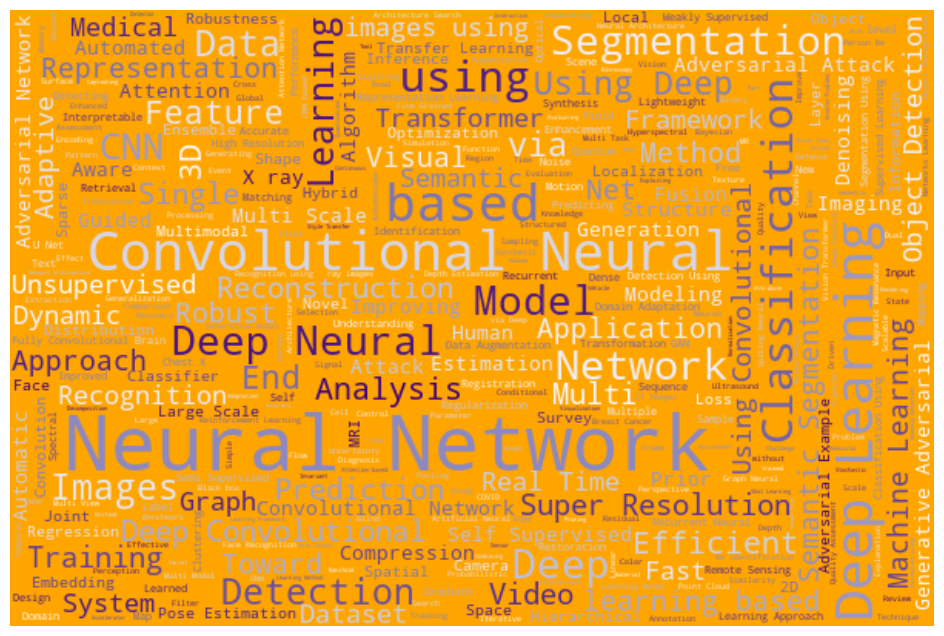

In [12]:
stopwords = set(STOPWORDS)
stop_list = ['Neural Network', 'Deep Learning', 'Image']
stopwords = list(STOPWORDS) + stop_list

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      colormap='Purples',
                      background_color="orange").generate(text2)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Since it's hard to get any conclusion directly from the word cloud image, I decide to rank the papers according to their comments index and select top 5 papers for more details.

## Category distribution

In [13]:
image_metadata['categories'].nunique()

8525

In [14]:
# Using groupby() and count()
df2 = image_metadata.groupby(['categories'])['categories'].count().reset_index(name='counts')
sortedDF=df2.sort_values('counts', ascending=False)

# select top 10 to visualize
df3 = sortedDF.iloc[:20]
print(df3)

               categories  counts
1469                cs.CV   26678
7                astro-ph    8223
4386        eess.IV cs.CV    3527
1960          cs.CV cs.LG    3073
157           astro-ph.GA    2902
454           astro-ph.SR    2308
1515          cs.CV cs.AI    1949
43            astro-ph.CO    1787
250           astro-ph.IM    1761
4407  eess.IV cs.CV cs.LG    1627
2152        cs.CV eess.IV    1531
3613        cs.LG stat.ML    1204
106           astro-ph.EP    1057
2938                cs.LG    1003
1613    cs.CV cs.AI cs.LG    1002
4294              eess.IV     951
2015  cs.CV cs.LG eess.IV     942
654     cond-mat.mtrl-sci     884
7465       physics.optics     802
214           astro-ph.HE     750


In [15]:
# Using groupby() and count()
#df2 = image_metadata.groupby(['categories'])['categories'].count().reset_index(name='counts')
sortedDF2=image_metadata.sort_values('comments', ascending=True)

# select top 10 to visualize
df4 = sortedDF2.iloc[:20]
print(df4['title'])

149913     Color Image Clustering using Block Truncation ...
149921              Distributed Object Medical Imaging Model
1460920       KAMA: 3D Keypoint Aware Body Mesh Articulation
1324182    KPRNet: Improving projection-based LiDAR seman...
1529747    A trainable monogenic ConvNet layer robust in ...
229863     Do we Need to Solve the Exozodi Question? If Y...
222596                               Simulating the WFXT sky
1330123    StyleFlow: Attribute-conditioned Exploration o...
1057641    The investigation of Euler's totient function ...
1752458    Automated Sunspot Detection as an Alternative ...
1300899    TensorFlow with user friendly Graphical Framew...
1276679    On the safety of vulnerable road users by cycl...
1341833    3D-DEEP: 3-Dimensional Deep-learning based on ...
1559185    PSZ2G091:A massive double cluster at z=0.822 o...
1510308                     Design of the ULTRASAT UV camera
1139685    A Partially Learned Algorithm for Joint Photoa...
2149294    Familles de p